In [1]:
#!pip install nltk gensim

# 1. Introduction to Word Embeddings

Word embeddings are a type of word representation that allows words with similar meaning to have a similar representation. Unlike one-hot encoding, which represents each word as an isolated vector, word embeddings capture the semantic relationships between words by representing them as vectors in a continuous vector space. This enables NLP models to understand word meanings based on their usage and context.

# 2. Exploring Pre-trained Word Embeddings
## Word2Vec
Download model from [Kaggle](https://www.kaggle.com/datasets/leadbest/googlenewsvectorsnegative300)

In [2]:
# Load and demonstrate Word2Vec
from gensim.models import KeyedVectors
# Example path, ensure you have the model downloaded
word_vectors = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)
print(word_vectors.most_similar('king'))

[('kings', 0.7138046622276306), ('queen', 0.6510956287384033), ('monarch', 0.6413194537162781), ('crown_prince', 0.6204219460487366), ('prince', 0.6159993410110474), ('sultan', 0.5864824056625366), ('ruler', 0.5797566771507263), ('princes', 0.5646552443504333), ('Prince_Paras', 0.5432944297790527), ('throne', 0.5422105193138123)]


## GloVe
Download model from [the Standford NLP Group](https://nlp.stanford.edu/data/glove.6B.zip) to test

In [3]:
import numpy as np
embeddings_index = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


# 3. Operations on Word Embeddings

In [4]:
# Word similarities
print(word_vectors.similarity('woman', 'man'))

0.76640123


In [5]:
# Word analogies
print(word_vectors.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.7118192911148071), ('monarch', 0.6189674735069275), ('princess', 0.5902431011199951), ('crown_prince', 0.5499460697174072), ('prince', 0.5377321243286133), ('kings', 0.5236844420433044), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134343147278), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]


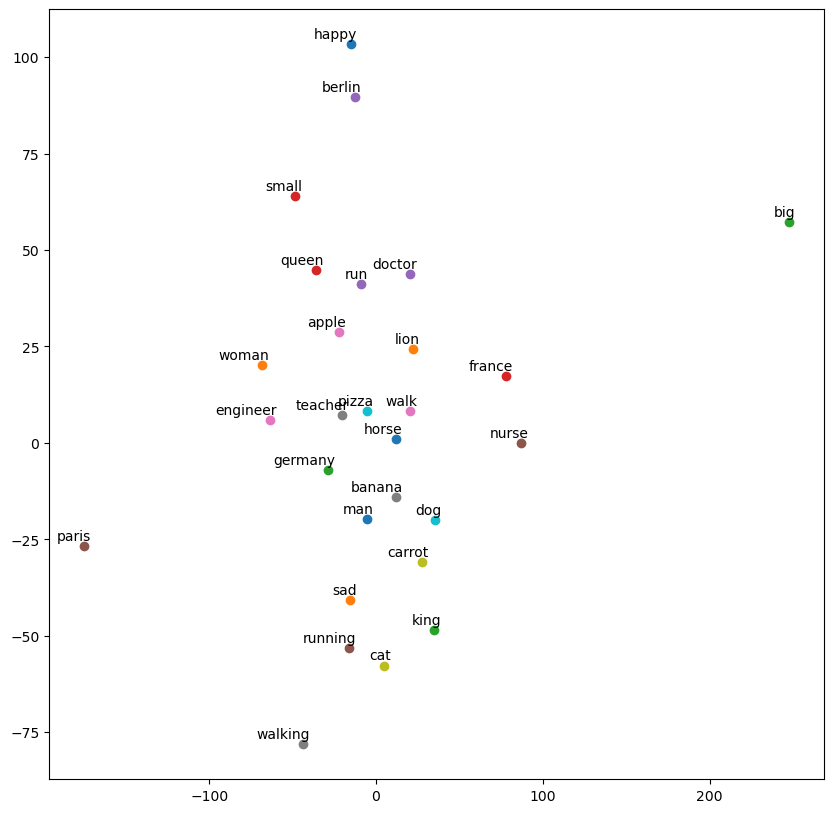

In [6]:
# t-SNE Visualization
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = [
    # Gender-related words to explore gender relationships
    'man', 'woman', 'king', 'queen', 
    
    # Words related to occupations for exploring professional associations
    'doctor', 'nurse', 'engineer', 'teacher', 
    
    # Category-based words like animals to see how well the model clusters similar entities
    'cat', 'dog', 'horse', 'lion', 
    
    # Words related to countries and cities for geographical associations
    'germany', 'france', 'berlin', 'paris', 
    
    # A mix of food-related words to explore another form of clustering
    'apple', 'banana', 'carrot', 'pizza', 
    
    # Commonly used adjectives for exploring descriptive associations
    'happy', 'sad', 'big', 'small',
    
    # Words for exploring analogies and relational similarities further
    'run', 'running', 'walk', 'walking',
]

embeddings = np.array([word_vectors[w] for w in words if w in word_vectors])

# Dynamically adjust perplexity based on the number of embeddings
perplexity_value = min(30, len(embeddings)-1)  # Ensure perplexity is less than the number of samples

tsne = TSNE(n_components=2, perplexity=perplexity_value)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 10))
for i, word in enumerate([w for w in words if w in word_vectors]):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, xy=(embeddings_2d[i, 0], embeddings_2d[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

# 4. Training Your Own Word Embeddings

In [7]:
# Step 1: Setup and Imports
import nltk
from nltk.corpus import gutenberg
from gensim.models import Word2Vec
import multiprocessing

# Download the Gutenberg corpus
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to /Users/uni/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /Users/uni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
# Step 2: Preprocess the Corpus
# Load and tokenize the sentences from the Gutenberg corpus
gutenberg_sentences = gutenberg.sents()

print(f"Number of sentences in Gutenberg corpus: {len(gutenberg_sentences)}")
print(f"Example sentence: {gutenberg_sentences[0]}")

Number of sentences in Gutenberg corpus: 98552
Example sentence: ['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']']


## (Optional) Exercise

Add a text cleaning step that removes stop words and other undesired tokens, unifies capitalization and stems.

In [9]:
# TODO: Further text cleaning

In [10]:
# Step 3: Train the Word2Vec Model
# Define the model
w2v_model = Word2Vec(vector_size=100,      # Size of word vectors
                     window=5,            # Context window size
                     min_count=5,         # Min. frequency count for inclusion
                     workers=multiprocessing.cpu_count())  # Use all CPU cores

# Build the vocabulary
w2v_model.build_vocab(gutenberg_sentences)

# Train the model
w2v_model.train(gutenberg_sentences, total_examples=w2v_model.corpus_count, epochs=10)

# Save the model for later use
w2v_model.save("gutenberg_word2vec.model")

In [11]:
# Step 4: Explore the Trained Embeddings
# Find words similar to 'king'
similar_words = w2v_model.wv.most_similar('king', topn=10)
print("Words similar to 'king':")
for word, similarity in similar_words:
    print(f"{word}: {similarity}")

Words similar to 'king':
ruler: 0.629402756690979
governor: 0.6132043600082397
David: 0.578052282333374
Esther: 0.5678066611289978
captain: 0.5616694092750549
Pharaoh: 0.5467228293418884
Media: 0.5380955934524536
King: 0.5362770557403564
Solomon: 0.5233573317527771
prince: 0.5223160982131958


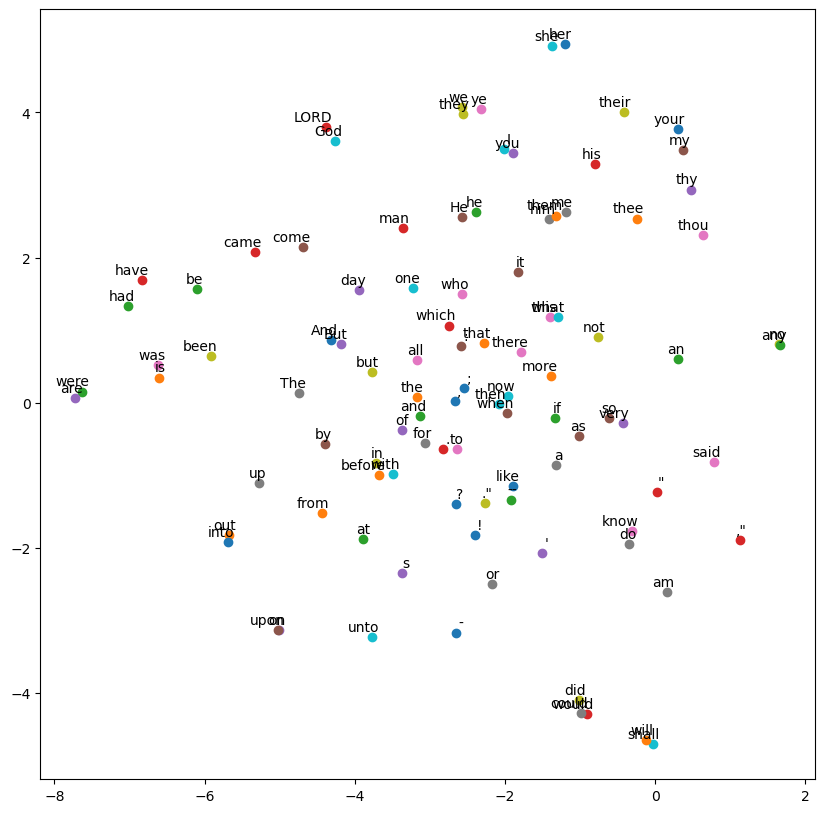

In [12]:
# Step 5: Visualize the Trained Embeddings
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Select the top 100 most frequent words to visualize
top_words = sorted(w2v_model.wv.index_to_key[:100], key=lambda word: w2v_model.wv.get_vecattr(word, "count"), reverse=True)

# Get the embeddings for these words
embeddings = w2v_model.wv[top_words]

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embeddings)

# Plot
plt.figure(figsize=(10,10))
for i, word in enumerate(top_words):
    plt.scatter(reduced_embeddings[i, 0], reduced_embeddings[i, 1])
    plt.annotate(word, xy=(reduced_embeddings[i, 0], reduced_embeddings[i, 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom')
plt.show()

# 5. Classify Some Tweets

In [13]:
import pandas as pd
import string
from nltk.corpus import stopwords
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from keras import optimizers

In [14]:
df = pd.read_csv('tweets.csv')
# Drop unnecessary columns
df = df.drop(columns = ["id","keyword","location"])

In [15]:
def clean_text(doc):
    # Convert all characters to lowercase
    doc = doc.lower()

    # Replace all punctuation with a space
    for char in string.punctuation:
        doc = doc.replace(char, ' ')

    # Split the text into tokens (words) using white space as a delimiter
    tokens = doc.split()

    # Remove tokens that are not alphabetic
    tokens = [word for word in tokens if word.isalpha()]

    # Filter out English stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]

    # Filter out short tokens (length <= 1)
    tokens = [word for word in tokens if len(word) > 1]

    # Join the tokens back into a single string with spaces in between
    doc = " ".join(tokens)

    return doc

def clean_df(df):
    # Initialize an empty list, cleaned_df
    cleaned_df = []

    # Iterate over each text in the 'text' column of the DataFrame
    for text in tqdm(df['text']):
        # Apply the clean_text function to each text
        clean = clean_text(text)

        # Append the cleaned text to the cleaned_df list
        cleaned_df.append(clean)

    # Return the cleaned_df list
    return cleaned_df

In [16]:
cleaned_df = df
cleaned_df['text'] = df['text'].apply(lambda x: clean_text(x))

# Splitting the data
train_x, test_x, train_y, test_y  = train_test_split(cleaned_df['text'], cleaned_df['target'], test_size=0.2)

In [20]:
train_x.shape

(9096,)

In [18]:
# Make vector embeddings with our word2vec model

def compute_doc_vectors(docs, w2v_model):
    # Initialize an empty list, doc_vectors
    doc_vectors = []

    # Iterate over each document in docs
    for doc in tqdm(docs):
        # Split the document into tokens
        tokens = doc.split()

        # Initialize an empty array, doc_vector, for the document's vector representation
        doc_vector = np.zeros(w2v_model.vector_size)

        # Initialize a count for the number of words in the document
        word_count = 0

        # Iterate over each token in tokens
        for token in tokens:
            # Check if the token is in the word2vec model's vocabulary
            if token in w2v_model.wv:
                # Add the word's vector representation to doc_vector
                doc_vector += w2v_model.wv[token]

                # Increment the word count
                word_count += 1

        # Divide the doc_vector by the number of words in the document
        doc_vector /= word_count

        # Append the doc_vector to doc_vectors
        doc_vectors.append(doc_vector)

    # Return the doc_vectors
    return np.array(doc_vectors)

# Compute the document vectors for the training and test sets
train_x_vectors = compute_doc_vectors(train_x, w2v_model)
test_x_vectors = compute_doc_vectors(test_x, w2v_model)

  0%|          | 0/9096 [00:00<?, ?it/s]/var/folders/r0/d0m6cs7x1fq_kvhchn4ktt5h0000gn/T/ipykernel_99941/2314980254.py:29: RuntimeWarning: invalid value encountered in divide
  doc_vector /= word_count
100%|██████████| 2274/2274 [00:00<00:00, 108663.70it/s]


In [22]:
train_x_vectors.shape

(9096, 100)

In [27]:
# Build the model
w2v_classification_model = Sequential()
w2v_classification_model.add(Dense(16, activation='relu', input_shape=(train_x_vectors.shape[1],)))
w2v_classification_model.add(Dense(1, activation='sigmoid'))

# Compile the model
w2v_classification_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

# Train the model
history = w2v_classification_model.fit(train_x_vectors, train_y)

285/285 [==============================] - 0s 450us/step - loss: nan - accuracy: 0.8141


In [28]:
loss, accuracy = w2v_classification_model.evaluate(test_x_vectors, test_y)
print(f'Test Accuracy: {accuracy*100:.2f}%')

72/72 [==============================] - 0s 417us/step - loss: nan - accuracy: 0.8039
Test Accuracy: 80.39%
